# **Importación de data**

In [9]:
import pandas as pd

In [10]:
df_clientes=pd.read_excel('data/clientes.xlsx')
df_kpis=pd.read_excel('data/ventas.xlsx')

In [11]:
df_clientes.head()

,id_interlocutor_origen,cod_boca_salida,segmentacion_tranx,segmento,flag_potential,id_compania_origen_r3,nom_sucursal,id_personal_origen,id_personal_supervisor_origen
0,1509772,BO,4 Bronce,Clásica,Con Potencial,871,DISTRIBUIDORA ATUQ (SULLANA),9015,8723
1,4065517,BO,4 Bronce,Clásica,Con Potencial,871,DISTRIBUIDORA ATUQ (SULLANA),2000000510,2000000620
2,1746336,BO,4 Bronce,Clásica,Con Potencial,871,DISTRIBUIDORA ATUQ (SULLANA),8817,8723
3,1678155,BO,4 Bronce,Clásica,Con Potencial,856,DISTRIBUIDORA ALIMENTOS DEL VALLE (TRUJILLO),2000000380,8204
4,1437943,BO,4 Bronce,Clásica,Con Potencial,856,DISTRIBUIDORA ALIMENTOS DEL VALLE (TRUJILLO),2000000374,8204


In [12]:
df_kpis.head()

,periodo,id_interlocutor_origen,Venta,Frecuencia
0,2025-07-01,1656911,99.90,0
1,2025-07-01,1630511,47.68,0
2,2025-07-01,4050604,105.32,0
3,2025-03-01,1763694,679.90,13
4,2025-07-01,1617939,95.23,0


# **Realización del experimento | Grupo Accion y Control**

In [13]:
from core import create_experiment

 INICIANDO DISEÑO EXPERIMENTAL AUTOMÁTICO
 Preparando datos...
   - Analizando últimos 6 meses: 2025-01 a 2025-06
   - Mes actual excluido: 2025-07
   - Clientes con datos suficientes: 433
 Optimizando semilla...
    Probando 200 semillas desde 7190...
      Semilla 7190: 23.1 
      Semilla 7195: 37.3
      Semilla 7200: 40.2
      Semilla 7205: 23.4
      Semilla 7210: 32.5
      Semilla 7215: 28.4
      Semilla 7220: 21.4
      Semilla 7225: 20.2
      Semilla 7230: 27.8
      Semilla 7235: 29.3
      Semilla 7240: 29.5
      Semilla 7245: 19.5
      Semilla 7250: 27.9
      Semilla 7255: 26.6
      Semilla 7260: 21.7
      Semilla 7265: 29.6
      Semilla 7270: 29.4
      Semilla 7275: 27.4
      Semilla 7280: 21.7
      Semilla 7285: 39.9
      Semilla 7290: 57.4
      Semilla 7295: 27.9
      Semilla 7300: 30.6
      Semilla 7305: 56.6
      Semilla 7310: 28.5
      Semilla 7315: 31.1
      Semilla 7320: 39.3
      Semilla 7325: 32.4
      Semilla 7330: 53.5
      Semilla 7335: 5

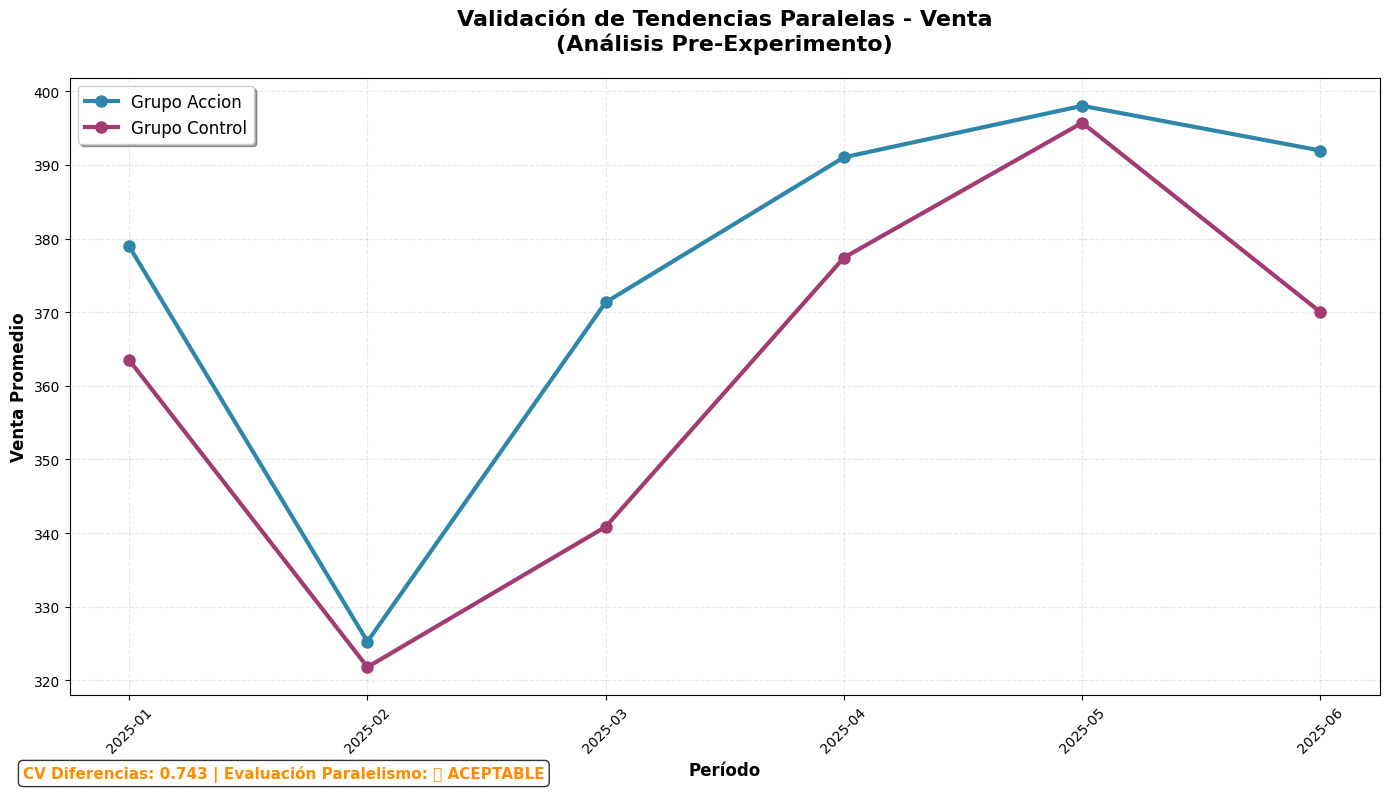

In [14]:
# 1. CREANDO EL EXPERIMENTO
result = create_experiment(
        df_clientes=df_clientes,
        df_kpis=df_kpis,
        cliente_id='id_interlocutor_origen',
        kpi_principal='Venta',
        periodo_analisis_meses=6,
        num_seeds=200,  # Más semillas para mejor optimización
        seed_start=7190
    )
    
# 2. REVISAR RESULTADOS
print("\n RESULTADOS:")
print(f"Quality Score: {result.quality_score}/100")
print("\n" + result.validation_report)
    
# 3. MOSTRAR GRÁFICO
print("\n Mostrando gráfico de tendencias paralelas...")
result.show_plot()
    
# 4. VER DISTRIBUCIÓN DE GRUPOS
print("\n DISTRIBUCIÓN DE GRUPOS:")
distribucion = result.grupos.groupby(['segmento', 'grupo']).size().unstack(fill_value=0)
print(distribucion)
    
# 5. GUARDAR RESULTADOS
print("\n Guardando resultados...")
result.save_results(prefix="ejemplo_piloto")
    
# 6. RESUMEN 
print("\n RESUMEN :")
summary = result.summary()
for key, value in summary.items():
    print(f"   • {key}: {value}")

# **Busqueda de Grupos espejos**

In [15]:
df_clientes['id_interlocutor_origen'].unique()

array([1509772, 4065517, 1746336, 1678155, 1437943, 4101334, 4047934,
       1018515, 1025463, 1023320, 1515932, 4064315, 1767159, 1716482,
       1768473, 4060718, 1745899, 1673065, 1768364, 1767298, 1021556,
       4063530, 1279967, 1767311, 4063347, 1559522, 1767158, 1367471,
       1278099, 1767026, 1119354, 4065512, 1487979, 1674432, 1018063,
       4047562, 4064433, 1280651, 4049036, 1688191, 1717959, 1023012,
       1763624, 4054475, 1277864, 1687048, 4051547, 1458822, 4048344,
       1651563, 1765793, 1690410, 4061677, 1646371, 4054300, 1562946,
       4062924, 1730581, 1713289, 4061607, 1710947, 1736165, 1511689,
       1529977, 1730698, 1280628, 1278659, 1737847, 1630511, 1765007,
       1736814, 1407165, 1694435, 1568684, 1737863, 4059071, 4061318,
       1760711, 1412949, 4054229, 1709968, 1740125, 4064264, 1763236,
       1766950, 1750262, 1218083, 4047951, 1121803, 1278502, 1734768,
       1760262, 1546906, 1644813, 1129464, 4063806, 4063050, 1277496,
       1027856, 1736

🔍 BÚSQUEDA DE GRUPO ESPEJO CON OPTIMIZACIÓN ROBUSTA
 Grupo accion definido: 98 clientes (lista de IDs)
 Preparando datos...
   - Analizando últimos 6 meses: 2025-01 a 2025-06
   - Clientes con datos suficientes: 433
   - Candidatos disponibles: 336
   - Estadísticas grupo referencia calculadas
 Optimizando grupo espejo con métricas robustas...
   🔍 Probando 500 semillas desde 7190...
         Semilla 7190: 21.3 
         Semilla 7193: 35.3 
      Evaluadas 5/500 semillas...
         Semilla 7195: 25.6
      Evaluadas 10/500 semillas...
         Semilla 7200: 19.6
      Evaluadas 15/500 semillas...
         Semilla 7205: 26.0
      Evaluadas 20/500 semillas...
         Semilla 7210: 39.5
      Evaluadas 25/500 semillas...
         Semilla 7215: 26.0
      Evaluadas 30/500 semillas...
         Semilla 7220: 31.4
         Semilla 7223: 48.4 
      Evaluadas 35/500 semillas...
         Semilla 7225: 29.2
      Evaluadas 40/500 semillas...
         Semilla 7229: 50.6 
         Semilla 7230:

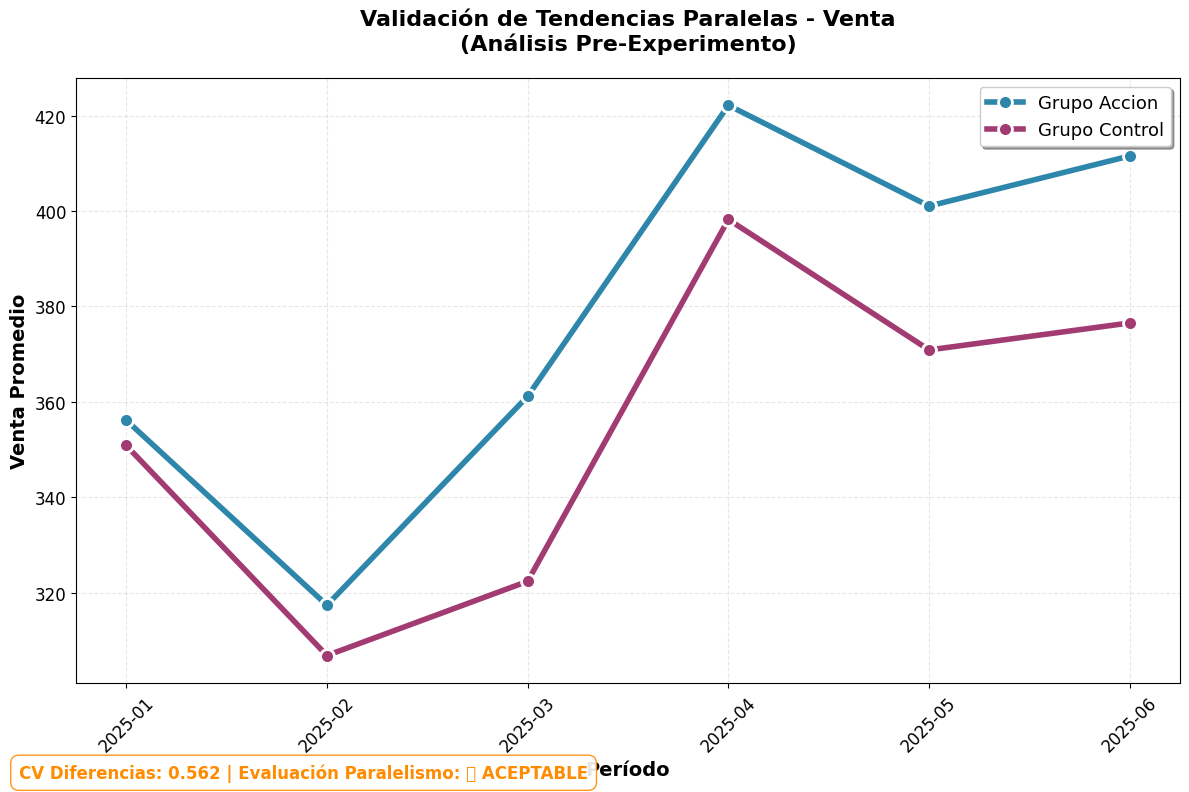

In [16]:
from mirror_group import find_mirror_group, find_control_for_action, optimize_mirror_seeds_batch
# Ya tienes un grupo de acción definido
grupo_accion_ids = [1509772, 4065517, 1746336, 1678155, 1437943, 4101334, 4047934,
       1018515, 1025463, 1023320, 1515932, 4064315, 1767159, 1716482,
       1768473, 4060718, 1745899, 1673065, 1768364, 1767298, 1021556,
       4063530, 1279967, 1767311, 4063347, 1559522, 1767158, 1367471,
       1278099, 1767026, 1119354, 4065512, 1487979, 1674432, 1018063,
       4047562, 4064433, 1280651, 4049036, 1688191, 1717959, 1023012,
       1763624, 4054475, 1277864, 1687048, 4051547, 1458822, 4048344,
       1651563, 1765793, 1690410, 4061677, 1646371, 4054300, 1562946,
       4062924, 1730581, 1713289, 4061607, 1710947, 1736165, 1511689,
       1529977, 1730698, 1280628, 1278659, 1737847, 1630511, 1765007,
       1736814, 1407165, 1694435, 1568684, 1737863, 4059071, 4061318,
       1760711, 1412949, 4054229, 1709968, 1740125, 4064264, 1763236,
       1766950, 1750262, 1218083, 4047951, 1121803, 1278502, 1734768,
       1760262, 1546906, 1644813, 1129464, 4063806, 4063050, 1277496] 

# Encuentra el mejor grupo control con optimización robusta
resultado = find_mirror_group(
    df_clientes=df_clientes,
    df_kpis=df_kpis,
    grupo_definido=grupo_accion_ids,
    cliente_id='id_interlocutor_origen',
    kpi_principal='Venta',
    periodo_analisis_meses=6,  # Analizar últimos 6 meses
    num_seeds=500,              # Probar 20 semillas (más robusto)
    seed_start=7190,           # Semilla inicial
    grupo_definido_tipo='accion'  # El grupo definido es "acción"
)

# Ver resultados (IGUAL QUE ANTES)
print(f"Quality Score: {resultado.quality_score}/100")
print(resultado.validation_report)
resultado.show_comparison()  # Gráfico de similitud mejorado
resultado.save_results("example_mirror_group")

# Obtener solo el grupo espejo encontrado
grupo_control = resultado.get_mirror_group('control')
print(f"Grupo control encontrado: {len(grupo_control)} clientes")